In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from matplotlib.colors import ListedColormap

In [214]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Wholesale customers data.csv')
df = dataset.values

In [215]:
scaler = MinMaxScaler()
norm = scaler.fit_transform(df)
dataset = pd.DataFrame(norm)

Escolher o range de colunas

In [265]:
leftSlice, rightSlice = map(int, input().split())

0 8


Elbow method para achar o k ótimo

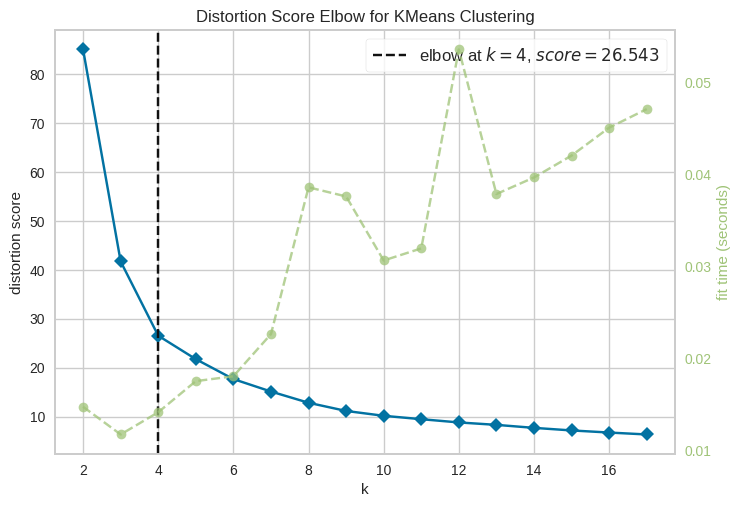

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [266]:
features = dataset.iloc[:, leftSlice:rightSlice]

model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2,18))

visualizer.fit(features)    
visualizer.poof()   

Testando diferentes números de clusters e comprovando pelo silhouette coefficient o k ótimo

Silhouette: 0.6593155081294824
K=4 Silhouette : 0.679962733411163
Silhouette: 0.6468088170046818
Silhouette: 0.6534663865655432
Silhouette: 0.5963777275585685


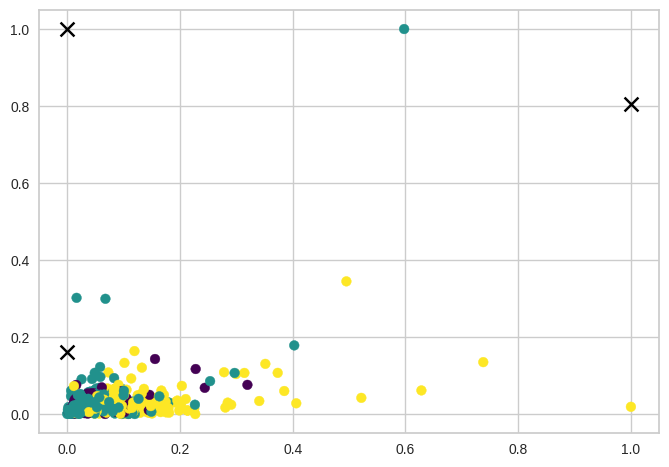

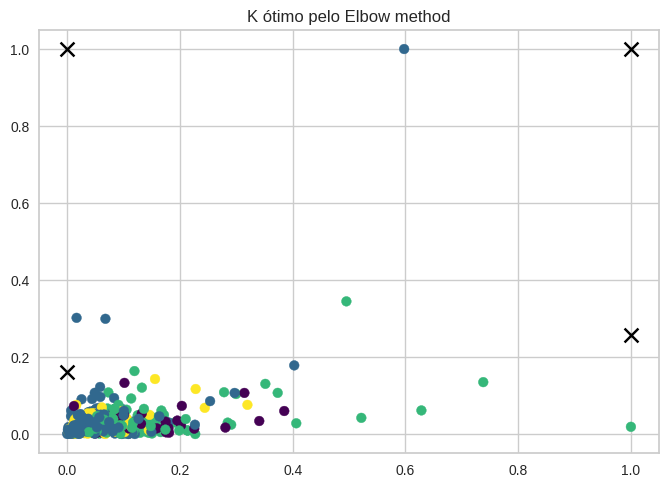

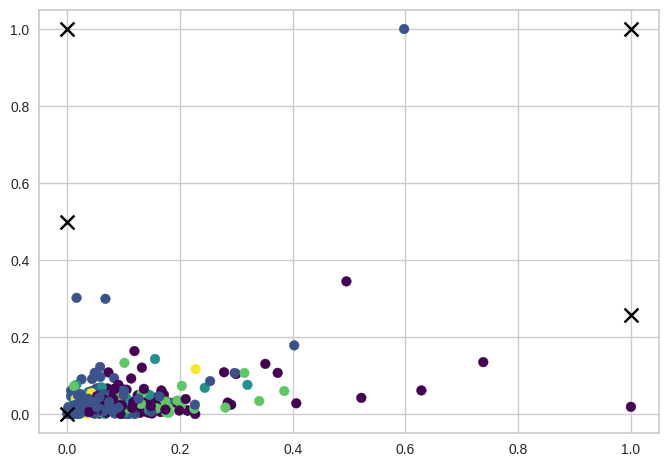

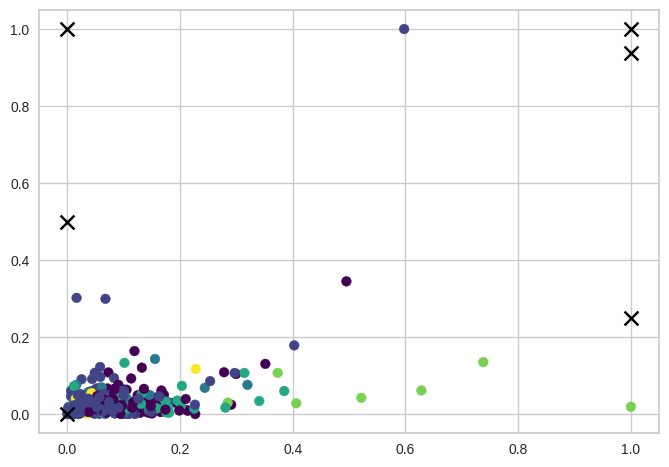

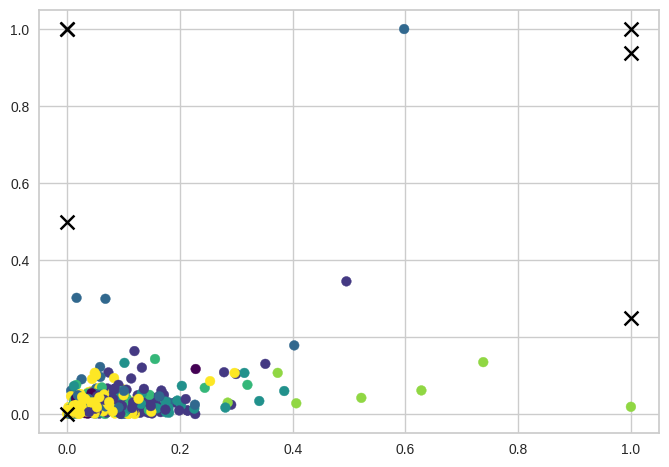

In [270]:
for i in range(3, 8):

  kmeans = KMeans(n_clusters=i, n_init=10)
  kmeans.fit(features)
  cluster_labels = kmeans.predict(features)

  silhouette_avg = metrics.silhouette_score(features, cluster_labels)
  centers = kmeans.cluster_centers_

  if i == 4:
    print(f'K=4 Silhouette : {silhouette_avg}')
  else:
    print(f'Silhouette: {silhouette_avg}')

  fig, ax = plt.subplots()

  ax.scatter(features[3], features[7], c=kmeans.labels_, cmap="cool")
  ax.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100)


  if i == 4:
    ax.set_title('K ótimo pelo Elbow method')